In [ ]:
1 qimport pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Comparing Super Bowl event for US and CANADA

In [ ]:
df_ca = pd.read_csv("/content/drive/MyDrive/AI Projects and Dataset/Twitter_Discourse/Super Bowl/Canada/CA_2019.csv")

In [ ]:
df_ca_rep = pd.read_csv("/content/drive/MyDrive/AI Projects and Dataset/Twitter_Discourse/Super Bowl/Canada/CA_2019_replies.csv")

In [ ]:
df_ca.shape, df_ca_rep.shape

((3220, 11), (15695, 11))

In [ ]:
df_us = pd.read_csv("/content/drive/MyDrive/AI Projects and Dataset/Twitter_Discourse/Super Bowl/US/US_2019.csv")

In [ ]:
df_us_rep = pd.read_csv("/content/drive/MyDrive/AI Projects and Dataset/Twitter_Discourse/Super Bowl/US/US_2019_replies.csv")

In [ ]:
df_ca.shape, df_ca_rep.shape, df_us.shape, df_us_rep.shape, 

((3220, 11), (15695, 11), (24708, 11), (61496, 11))

In [ ]:
df_ca.head()

,tweet_id,text,author_id,created_at,place_id,like_count,quote_count,reply_count,retweet_count,conversation_id,in_reply_to_user_id
0,1091136188453392389,@FETHER9 @jimmykimmel @IAMGUILLERMO @NFL @Ndam...,14547447,2019-02-01T00:48:34.000Z,3797791ff9c0e4c6,0,0,0,0,1091133959512051712,1.872017e+08
1,1091135084839735296,@Badassboom666 Mulligan pour le #SuperBowl ? 🤔,3483882497,2019-02-01T00:44:11.000Z,36775d842cbec509,0,0,1,0,1091131276940230656,8.921094e+17
2,1091134330729046016,Pairs well with the chili from @tastebrodo. Me...,159636666,2019-02-01T00:41:11.000Z,4194d285edec464d,0,0,0,1,1091134330729046016,NaN
3,1091131614661353472,I'm looking to buy a Brady jersey for the Supe...,51111698,2019-02-01T00:30:23.000Z,3797791ff9c0e4c6,2,0,1,0,1091131614661353472,NaN
4,1091129349712039937,LATEST: Stacey Abrams is set to make a Super B...,38328506,2019-02-01T00:21:23.000Z,5c43cbdfce4d3247,0,0,0,0,1091129349712039937,NaN


## Word Analysis

### 1. HashTags Comparision

In [ ]:
import itertools

In [ ]:
st = "#super"
st[0:6]

'#super'

In [ ]:
d = {1: 2, 3: 4, 5: 6}


In [ ]:
def top_n_hastags(hashtag_dict:dict, n: int):
  sorted_dict = dict(sorted(hashtag_dict.items(), key=lambda x: x[1], reverse=True))
  
  topn_hash = dict()
  count = 0
  for x, y in sorted_dict.items():
    if x[0:6] == "#super":
      continue
    if count > n:
      break
    if x != "#sundayfunday" and x!= "#superbowl":
      topn_hash[x] = y
    count+=1
  lst = [*dict(itertools.islice(topn_hash.items(), n))]
  return topn_hash, lst

In [ ]:
def get_hashtags(text:str, hash_tags:dict):
  lst = re.findall(r'\B#\w*[a-zA-Z]+\w*', text)
  for x in lst:
    x = x.lower()
    if x in hash_tags:
      hash_tags[x]+=1
    else:
      hash_tags[x]=1

In [ ]:
dict_ca = dict()
dict_ca_rep = dict()
dict_us = dict()
dict_us_rep = dict()

In [ ]:
df_ca.text.apply(lambda x: get_hashtags(x, dict_ca))
df_ca_rep.text.apply(lambda x: get_hashtags(x, dict_ca_rep))
df_us.text.apply(lambda x: get_hashtags(x, dict_us))
df_us_rep.text.apply(lambda x: get_hashtags(x, dict_us_rep))

0        None
1        None
2        None
3        None
4        None
         ... 
61491    None
61492    None
61493    None
61494    None
61495    None
Name: text, Length: 61496, dtype: object

In [ ]:
len(dict_ca), len(dict_ca_rep), len(dict_us), len(dict_us_rep)

(1681, 977, 10649, 2417)

In [ ]:
ca_20, ca_20_lst= top_n_hastags(dict_ca, 20)
ca_rep_20, ca_rep_20_lst = top_n_hastags(dict_ca_rep, 20)
us_20, us_20_lst = top_n_hastags(dict_us, 20)
us_rep_20, us_rep_20_lst = top_n_hastags(dict_us_rep, 20)

In [ ]:
def print_list(lst):
  for x in lst:
    print(x, end = " ")
  print()

In [ ]:
print_list(ca_20_lst)
print_list(us_20_lst)
print()
print()
print_list(ca_rep_20_lst)
print_list(us_rep_20_lst)

#patriots #sbliii #nfl #rams #gopats #everythingwegot #football #larams #halftimeshow #beatne #sbllll #patriotsvsrams #tombrady #maroon5 #ramshouse #yyc #nevslar #beer #sunday #goat 
#patriots #sbliii #nfl #atlanta #rams #gopats #larams #atl #football #everythingwegot #tombrady #newenglandpatriots #sbxespn #patriotsnation #patsnation #sotu #gorams #boston #goat #losangeles 


#exo #rickyisgod #yougetoutwhatyouputin #sbliii #gopats #boycottgm #patriots #larams #boycottmexicogm #saveoshawagm #greedymotors #rams #nfl #weareoneexo #everythingwegot #bts #canada #gm #cdnpoli #canpoli 
#tostitoslivebowl #globalgoodemi #gopats #cookies #larams #everythingwegot #sbliii #chiefskingdom #gorams #whodat #chiefskindgom #rams #patriots #nfl #fakenews #flyeaglesfly #allin #boycottsuperbowl #whodatnation #maga 


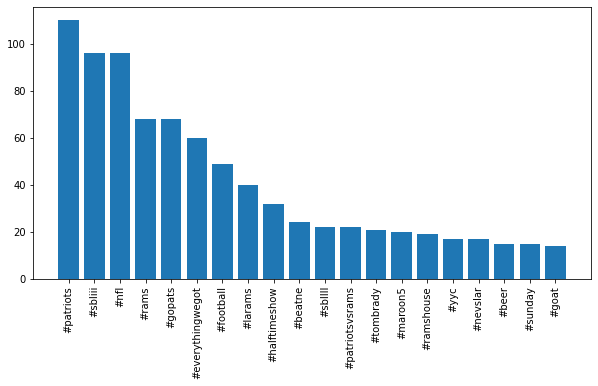

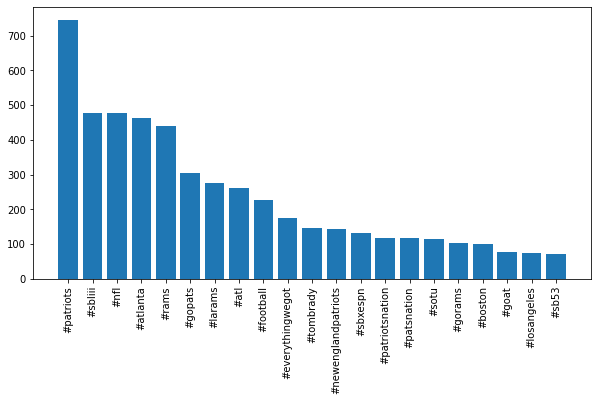

In [ ]:
plt.figure(figsize = (10, 5))
x, y  = zip(*ca_20.items())
plt.bar(x, y)
plt.xticks(x)
plt.xticks(rotation = 90)
plt.show()
plt.figure(figsize = (10, 5))
x, y  = zip(*us_20.items())
plt.bar(x, y)
plt.xticks(x)
plt.xticks(rotation = 90)
plt.show()

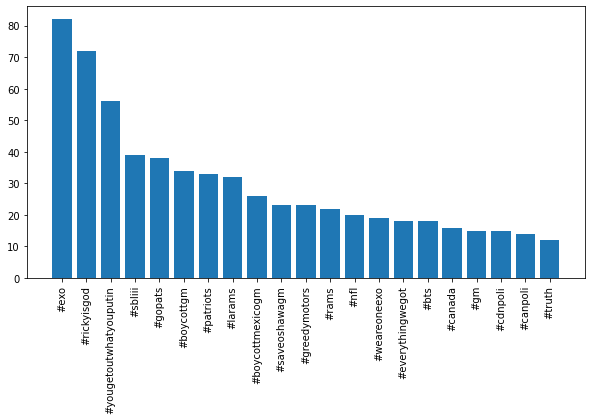

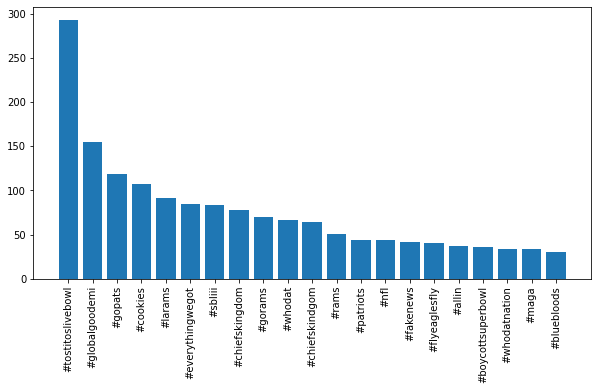

In [ ]:
plt.figure(figsize = (10, 5))
x, y  = zip(*ca_rep_20.items())
plt.bar(x, y)
plt.xticks(x)
plt.xticks(rotation = 90)
plt.show()
plt.figure(figsize = (10, 5))
x, y  = zip(*us_rep_20.items())
plt.bar(x, y)
plt.xticks(x)
plt.xticks(rotation = 90)
plt.show()

##2. Mentions

In [ ]:
def get_mentions(text:str, mention:dict):
  lst = re.findall(r'\B@\w*[a-zA-Z]+\w*', text)
  for x in lst:
    x = x.lower()
    if x in mention:
      mention[x]+=1
    else:
      mention[x]=1

In [ ]:
dict_ca_ment = dict()
dict_ca_rep_ment = dict()
dict_us_ment = dict()
dict_us_rep_ment = dict()

In [ ]:
def top_n_mentions(hashtag_dict:dict, n: int):
  sorted_dict = dict(sorted(hashtag_dict.items(), key=lambda x: x[1], reverse=True))
  lst = [*dict(itertools.islice(sorted_dict.items(), n))]
  return dict(itertools.islice(sorted_dict.items(), n))

In [ ]:
df_ca.text.apply(lambda x: get_mentions(x, dict_ca_ment))
df_ca_rep.text.apply(lambda x: get_mentions(x, dict_ca_rep_ment))
df_us.text.apply(lambda x: get_mentions(x, dict_us_ment))
df_us_rep.text.apply(lambda x: get_mentions(x, dict_us_rep_ment))

0        None
1        None
2        None
3        None
4        None
         ... 
61491    None
61492    None
61493    None
61494    None
61495    None
Name: text, Length: 61496, dtype: object

In [ ]:
ca_20_menlst= top_n_mentions(dict_ca_ment, 20)
ca_rep_20_menlst = top_n_mentions(dict_ca_rep_ment, 20)
us_20_menlst = top_n_mentions(dict_us_ment, 20)
us_rep_20_menlst = top_n_mentions(dict_us_rep_ment, 20)

In [ ]:
print_list(ca_20_menlst)
print_list(ca_rep_20_menlst)

@superbowl @patriots @nfl @ramsnfl @youtube @maroon5 @cbs @gm @adamlevine @unifortheunion @nflcanada @tonyromo @edelman11 @alcoholjustice @freeoursports @abinbev @davidlogan2020 @drwilliams7777 @tammysergio2 @oohlalalina 
@superbowl @nfl @unifortheunion @patriots @gm @realdonaldtrump @ramsnfl @cbs @facethenation @gmcanada @justintrudeau @cafreeland @bumpnrungilm0re @maroon5 @thatericalper @kaitlynbristowe @rickygervais @elreyapostador @bwagz @cnn 


In [ ]:
print_list(us_20_menlst)
print_list(us_rep_20_menlst)

@superbowl @patriots @nfl @ramsnfl @youtube @espndeportes @atlsuperbowl53 @maroon5 @edelman11 @adamlevine @saints @realdonaldtrump @eagles @mbstadium @espn @cbs @tyltent @washingtonpost @trvisxx @kaepernick7 
@superbowl @nfl @ramsnfl @patriots @chiefs @atlantafalcons @tonygonzalez88 @rogerwaters @maroon5 @change @trvisxx @bigboi @clemsonfb @thekitchn @cbs @realdonaldtrump @tg3ii @gmfb @atlsuperbowl53 @sj39 


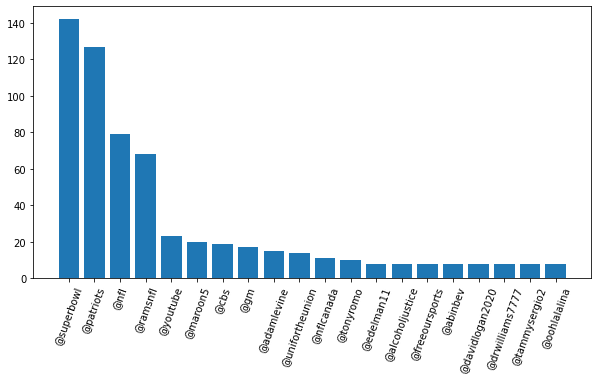

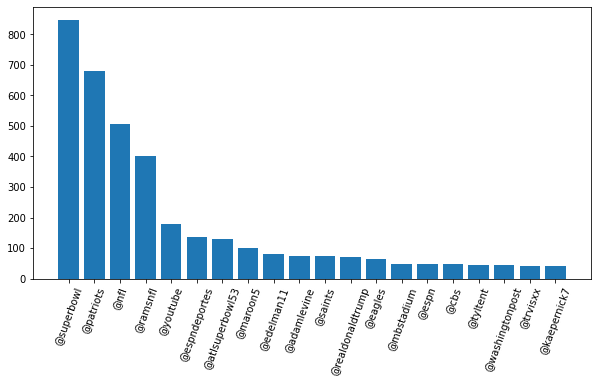

In [ ]:
plt.figure(figsize = (10, 5))
x, y  = zip(*ca_20_menlst.items())
plt.bar(x, y)
plt.xticks(x)
plt.xticks(rotation = 70)
plt.show()
plt.figure(figsize = (10, 5))
x, y  = zip(*us_20_menlst.items())
plt.bar(x, y)
plt.xticks(x)
plt.xticks(rotation = 70)
plt.show()

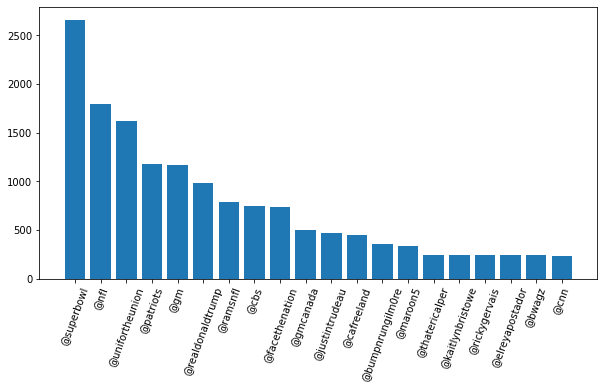

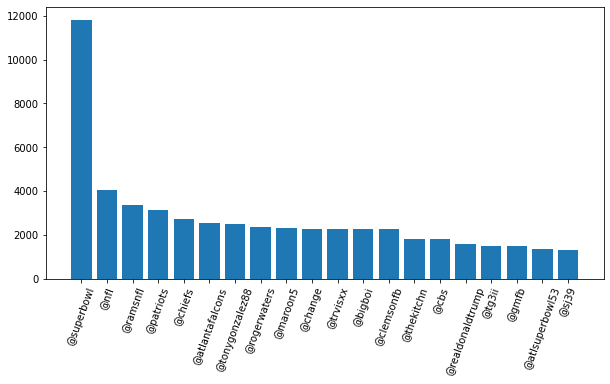

In [ ]:
plt.figure(figsize = (10, 5))
x, y  = zip(*ca_rep_20_menlst.items())
plt.bar(x, y)
plt.xticks(x)
plt.xticks(rotation = 70)
plt.show()
plt.figure(figsize = (10, 5))
x, y  = zip(*us_rep_20_menlst.items())
plt.bar(x, y)
plt.xticks(x)
plt.xticks(rotation = 70)
plt.show()

## 3. Data Cleaning

In [ ]:
!pip install pycorenlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pycorenlp: filename=pycorenlp-0.3.0-py3-none-any.whl size=2145 sha256=817680f4af6fa817fa8be125004885c315676493702fa6869e91e6b962eb8dc7
  Stored in directory: /root/.cache/pip/wheels/83/d8/ad/6b2276343ac605ee47e6beddb28331e96377909e5c816539c3
Successfully built pycorenlp


In [ ]:
#import libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from PIL import Image
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import (
    wordnet,
    stopwords
)
import sklearn
from sklearn.preprocessing import Normalizer
from sklearn.feature_extraction.text import (
    CountVectorizer,
    TfidfVectorizer
)
from tqdm.auto import tqdm
tqdm.pandas()
from pycorenlp import StanfordCoreNLP
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
!pip install contractions
import contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 287 kB 4.1 MB/s 
     |████████████████████████████████| 106 kB 46.4 MB/s 


In [ ]:
stop_words_list = stopwords.words('english')

### Can we classify countries based to tweet context??? Futile???

In [ ]:
def preprocessing_text(table):
    #put everythin in lowercase
    table['tweet'] = table['text'].str.lower()
    #Fix contractions
    table['tweet'] = table['tweet'].apply(lambda x: ' '.join([contractions.fix(word) for word in x.split()]))
    #remove stopwords
    table['tweet'] = table['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words_list)]))
    #Replace rt indicating that was a retweet
    table['tweet'] = table['tweet'].str.replace('rt', '')
    #Replace occurences of mentioning @UserNames
    table['tweet'] = table['tweet'].replace(r'@\w+', '', regex=True)
    #Replace links contained in the tweet
    table['tweet'] = table['tweet'].replace(r'http\S+', '', regex=True)
    table['tweet'] = table['tweet'].replace(r'www.[^ ]+', '', regex=True)
    #remove numbers
    table['tweet'] = table['tweet'].replace(r'[0-9]+', '', regex=True)
    #replace special characters and puntuation marks
    table['tweet'] = table['tweet'].replace(r'[!"#$%&()*+,-./:;<=>?@[\]^_`{|}~]', '', regex=True)
    return table    

In [ ]:
preprocessing_text(df_ca)

,tweet_id,text,author_id,created_at,place_id,like_count,quote_count,reply_count,retweet_count,conversation_id,in_reply_to_user_id,tweet
0,1091136188453392389,@FETHER9 @jimmykimmel @IAMGUILLERMO @NFL @Ndam...,14547447,2019-02-01T00:48:34.000Z,3797791ff9c0e4c6,0,0,0,0,1091133959512051712,1.872017e+08,bahahahahaha
1,1091135084839735296,@Badassboom666 Mulligan pour le #SuperBowl ? 🤔,3483882497,2019-02-01T00:44:11.000Z,36775d842cbec509,0,0,1,0,1091131276940230656,8.921094e+17,mulligan pour le superbowl 🤔
2,1091134330729046016,Pairs well with the chili from @tastebrodo. Me...,159636666,2019-02-01T00:41:11.000Z,4194d285edec464d,0,0,0,1,1091134330729046016,NaN,pairs well chili mentally preparing super bow...
3,1091131614661353472,I'm looking to buy a Brady jersey for the Supe...,51111698,2019-02-01T00:30:23.000Z,3797791ff9c0e4c6,2,0,1,0,1091131614661353472,NaN,looking buy brady jersey super bowl apparently...
4,1091129349712039937,LATEST: Stacey Abrams is set to make a Super B...,38328506,2019-02-01T00:21:23.000Z,5c43cbdfce4d3247,0,0,0,0,1091129349712039937,NaN,latest stacey abrams set make super bowl debut
...,...,...,...,...,...,...,...,...,...,...,...,...
3215,1093612509905317888,"@missfree \r\nWell, it IS your birthday so I w...",36982392,2019-02-07T20:48:35.000Z,04c219a0705982cf,0,0,0,0,1093612509905317888,2.374870e+07,well bihday wish amazing bihday also bleh con...
3216,1093643291294195712,Just finished watching Super Bowl 53 Mic’d Up....,3301659607,2019-02-07T22:50:54.000Z,6a6d896ba1cb5dc4,3,0,0,0,1093643291294195712,NaN,finished watching super bowl mic’d up obvious...
3217,1093633060241690624,"A big Shout Out and Huge Thanks to all of YOU,...",1408604702,2019-02-07T22:10:14.000Z,4516bcae4ad207f1,0,0,0,0,1093633060241690624,NaN,big shout huge thanks you donated helped out a...
3218,1093659371211350016,I didn’t miss Cris Collinsworth’s sanctimoniou...,175925311,2019-02-07T23:54:47.000Z,5c43cbdfce4d3247,1,0,0,0,1093659371211350016,NaN,miss cris collinswoh’s sanctimonious comments ...


In [ ]:
df_ca.columns

Index(['tweet_id', 'text', 'author_id', 'created_at', 'place_id', 'like_count',
       'quote_count', 'reply_count', 'retweet_count', 'conversation_id',
       'in_reply_to_user_id', 'tweet'],
      dtype='object')

In [ ]:
from wordcloud import STOPWORDS
from PIL import Image

In [ ]:
text1 = " ".join(title for title in df_ca.tweet)

In [ ]:
 mask = np.array(Image.open('/content/drive/MyDrive/AI Projects and Dataset/Twitter_Discourse/Super Bowl/Canada/image_ca.png'))

In [ ]:
wc = WordCloud(stopwords=STOPWORDS,
                background_color="black",
               max_words=2000, max_font_size=256,
               random_state=42, width=mask.shape[1],
               height=mask.shape[0])
wc.generate(text1)

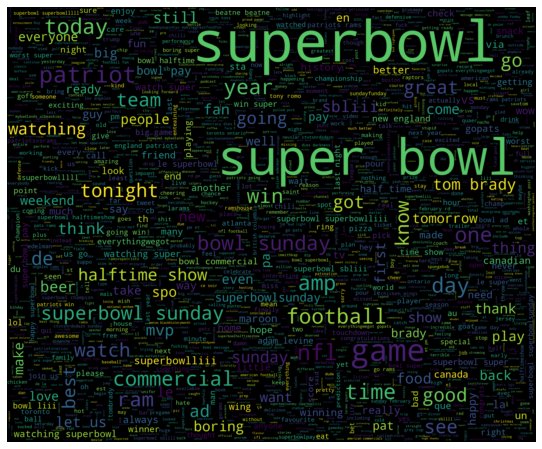

In [ ]:
plt.figure(figsize=(16, 8))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
preprocessing_text(df_ca_rep)

,tweet_id,text,author_id,created_at,place_id,like_count,quote_count,reply_count,retweet_count,conversation_id,in_reply_to_user_id,tweet
0,1091756804617523203,@jimmykimmel @IAMGUILLERMO @NFL @NdamukongSuh ...,90255331,2019-02-02T17:54:40.000Z,NaN,0,0,0,0,1091133959512051712,26053643,tomtouchestt
1,1091612739246551040,@jimmykimmel @IAMGUILLERMO @NFL @NdamukongSuh ...,958239683263086594,2019-02-02T08:22:12.000Z,NaN,0,0,1,0,1091133959512051712,26053643,hey town monday friends beatl...
2,1091583171660001280,@jimmykimmel @IAMGUILLERMO @NFL @NdamukongSuh ...,917427470265143302,2019-02-02T06:24:43.000Z,NaN,0,0,0,0,1091133959512051712,26053643,comment ralphnohman blackface
3,1091581253717962752,@jimmykimmel @IAMGUILLERMO @NFL @NdamukongSuh ...,93347607,2019-02-02T06:17:06.000Z,NaN,0,0,0,0,1091133959512051712,26053643,ay te aguantas que gusto da ve...
4,1091338943897886722,@goehringer @NorthHavenYYC @calstampeders @bro...,518148378,2019-02-01T14:14:14.000Z,NaN,1,0,0,0,1091160374269734912,17646943,whooooo go pats onthebandwagon 🙌🏼
...,...,...,...,...,...,...,...,...,...,...,...,...
15690,1093315928488464386,@MarkBermanFox26 @sonofbum @RamsNFL We love th...,1953021906,2019-02-07T01:10:04.000Z,NaN,3,0,0,0,1093304141152223232,78515008,love dude incredible defensive performance...
15691,1093310086351650816,@MarkBermanFox26 @McClain_on_NFL @sonofbum @Ra...,708469662787305472,2019-02-07T00:46:51.000Z,NaN,6,0,1,0,1093304141152223232,78515008,still get texans let wade phillips go best...
15692,1093164680162537473,@worldcurling @usacurl @jtimberlake @CurlGrani...,529553725,2019-02-06T15:09:04.000Z,NaN,0,0,0,0,1092766272125919234,440781590,jt come check action nats volunteering th...
15693,1092830569950601216,@worldcurling @jtimberlake @CurlGraniteWPG I b...,793807375316561920,2019-02-05T17:01:26.000Z,NaN,1,0,0,0,1092766272125919234,440781590,bet thought check heard chose conce omaha...


In [ ]:
text1 = " ".join(title for title in df_ca_rep.tweet)

In [ ]:
wc = WordCloud(stopwords=STOPWORDS,
                background_color="black",
               max_words=1000, max_font_size=256,
               random_state=42, width=mask.shape[1],
               height=mask.shape[0])
wc.generate(text1)

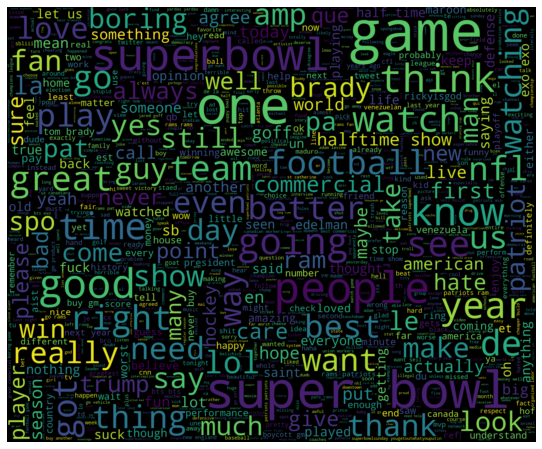

In [ ]:
plt.figure(figsize=(16, 8))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
preprocessing_text(df_us)
preprocessing_text(df_us_rep)

,tweet_id,text,author_id,created_at,place_id,like_count,quote_count,reply_count,retweet_count,conversation_id,in_reply_to_user_id,tweet
0,1093986790606860294,@IAMQUEENLATIFAH @STAR @MsPattiPatti Love Star...,1092902045521244160,2019-02-08T21:35:50.000Z,NaN,0,0,0,0,1091137577497718784,50826280,love star💗💗💗👍
1,1093449036999376896,@IAMQUEENLATIFAH @STAR @MsPattiPatti Dr. Pinky...,633830564,2019-02-07T09:59:00.000Z,NaN,0,0,0,0,1091137577497718784,50826280,dr pinky miller one real students attended ...
2,1092720283381841920,@IAMQUEENLATIFAH @STAR @MsPattiPatti You too b...,1000988968622678017,2019-02-05T09:43:11.000Z,NaN,0,0,0,0,1091137577497718784,50826280,bring joy thanks
3,1092575551116722183,@IAMQUEENLATIFAH @STAR @MsPattiPatti Queen whe...,336937450,2019-02-05T00:08:05.000Z,NaN,0,0,0,0,1091137577497718784,50826280,queen tell mspatti woman could make role me...
4,1092524165448507396,@IAMQUEENLATIFAH @STAR @MsPattiPatti Be my gf,1091153819982012416,2019-02-04T20:43:53.000Z,NaN,0,0,0,0,1091137577497718784,50826280,gf
...,...,...,...,...,...,...,...,...,...,...,...,...
61491,1092051277683535874,"@JoshPalmerMMA @KASAIGrappling Mr P, I wasn’t ...",61851812,2019-02-03T13:24:48.000Z,NaN,5,0,2,0,1092020412916076545,108644148,mr p going forward keep banging inside outsi...
61492,1092050523396677633,@KrisCarter18 New England 31 LA Rams 27\r\nTom...,113578896,2019-02-03T13:21:48.000Z,NaN,1,0,0,0,1092018877402365952,748536048007905281,new england la rams tom brady probably mvp ...
61493,1092046012762542080,@KrisCarter18 Rams Win 37-34 In OT Gurley Wins...,3534740386,2019-02-03T13:03:53.000Z,NaN,1,0,0,0,1092018877402365952,748536048007905281,rams win ot gurley wins mvp yards passing g...
61494,1092030513844502528,@JessicaGagneTV @MBStadium So excited!!!! Have...,108489477,2019-02-03T12:02:18.000Z,NaN,1,0,0,0,1092019196911935488,1131449988,excited lots fun


In [ ]:
text2 = " ".join(title for title in df_us.tweet)
text3 = " ".join(title for title in df_us_rep.tweet)

In [ ]:
wc2 = WordCloud(stopwords=STOPWORDS,
                background_color="black",
               max_words=500, max_font_size=256,
               random_state=42, width=mask.shape[1],
               height=mask.shape[0])
wc2.generate(text2)

In [ ]:
wc3 = WordCloud(stopwords=STOPWORDS,
                background_color="black",
               max_words=500, max_font_size=256,
               random_state=42, width=mask.shape[1],
               height=mask.shape[0])
wc3.generate(text3)

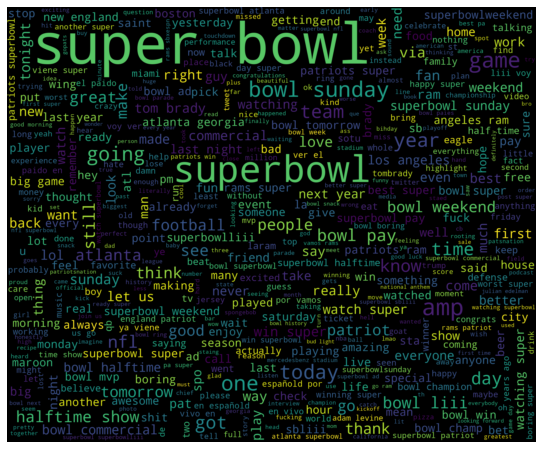

In [ ]:
plt.figure(figsize=(16, 8))
plt.imshow(wc2, interpolation="bilinear")
plt.axis('off')
plt.show()

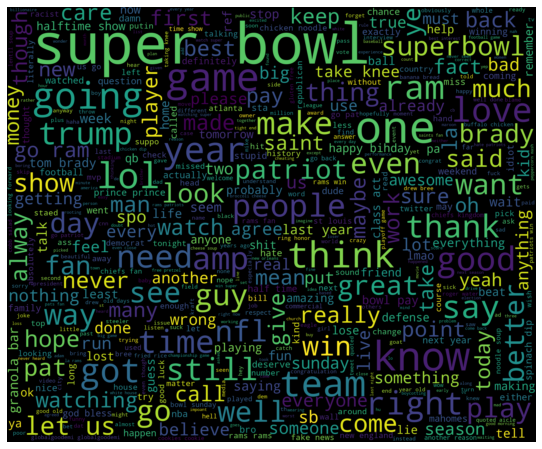

In [ ]:
plt.figure(figsize=(16, 8))
plt.imshow(wc3, interpolation="bilinear")
plt.axis('off')
plt.show()

LINK for A TUTORIAL : https://www.kaggle.com/code/ratan123/data-analysis-of-tweets-on-australian-election